In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


<div style="color:white;background-color:Fuchsia;padding:3%;border-radius:150px 150px;font-size:1.5em;text-align:center"> <font color="White" size=+2.5 face="Lucida Calligraphy"><div style="align:center: justify">Evaluation Metrics in ML/AI for Classification </font></div>

<font color="Fuchsia"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Fuchsia"> Introduction  </h1>

<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Fuchsia"> This notebook aims to:  </h2>

 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5F1666;
           font-size:22px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>Explain different types of Evaluation Metrics used in ML/AI</b>
        </p>

<font color="Fuchsia"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:20px; color:Fuchsia"> The different types od Evaluation Metrics used in this project are:  </h1>

1.Confusion Matrix

2.Classification Report

3.Classification accuracy 

4.Classification Error

5.Precision

6.Recall 

7.True Positive Rate

8.True False Positive Rate

9.Specificity

10.Sensitivity

11.F1 Score 

12.Support 

13.ROC CUrve

14.Precision Recall Curve

<font color="Fuchsia"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Fuchsia"> Library Importing  </h1>

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.metrics import plot_confusion_matrix,roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import recall_score, plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.precision", 3)

In [4]:
heart = pd.read_csv('../input/heart-failure-prediction/heart.csv')
heart.head().style.set_properties(**{'background-color': 'Olive',
                           'color': 'white',
                           'border-color': 'darkblack'})

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000,Up,0


<font color="DarkGreen" size=+2 face="Lucida Calligraphy"><div style="text-align: justify"> Attributes:</font>
    
- **Age:** Age of the patient [years]
    
- **Sex:** Sex of the patient [M: Male, F: Female]
    
- **ChestPainType:** Chest Pain Type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

- **RestingBP:** Resting blood pressure [mm Hg]

- **Cholesterol:** Serum cholesterol [mm/dl]
    
- **FastingBS:** Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    
- **RestingECG**: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    
- **MaxHR:** Maximum heart rate achieved [Numeric value between 60 and 202]
    
- **ExerciseAngina:** Exercise-induced angina [Y: Yes, N: No]
    
- **Oldpeak:** Oldpeak = ST [Numeric value measured in depression]
    
- **ST_Slope:** The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    
- **HeartDisease:** Output class [1: heart disease, 0: Normal]

In [5]:
display(heart.shape)
display(heart.size)

(918, 12)

11016

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000,918.000,918.000,918.000,918.000,918.000,918.000
mean,53.511,132.397,198.800,0.233,136.809,0.887,0.553
std,9.433,18.514,109.384,0.423,25.460,1.067,0.497
min,28.000,0.000,0.000,0.000,60.000,-2.600,0.000
25%,47.000,120.000,173.250,0.000,120.000,0.000,0.000
50%,54.000,130.000,223.000,0.000,138.000,0.600,1.000
75%,60.000,140.000,267.000,0.000,156.000,1.500,1.000
max,77.000,200.000,603.000,1.000,202.000,6.200,1.000


In [8]:
heart.isnull().mean()*100

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

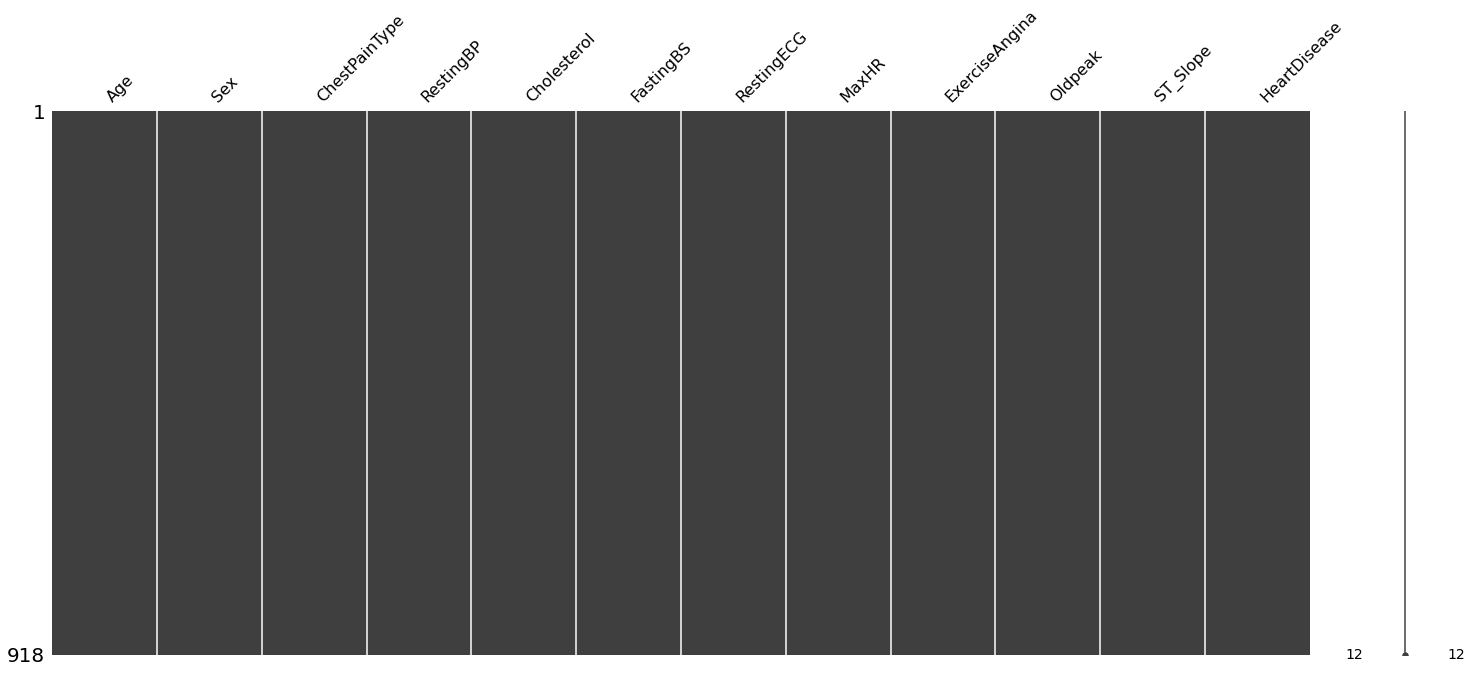

In [9]:
import missingno as msno
msno.matrix(heart)
plt.show()

In [10]:
print(f'We have {heart.shape[0]} instances with the {heart.shape[1]-1} features and 1 output variable')

We have 918 instances with the 11 features and 1 output variable


In [11]:
pd.DataFrame(abs(heart.corr()['HeartDisease']))

,HeartDisease
Age,0.282
RestingBP,0.108
Cholesterol,0.233
FastingBS,0.267
MaxHR,0.400
Oldpeak,0.404
HeartDisease,1.000


<font color="Fuchsia"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Fuchsia"> Data train test split  </h1>

In [12]:
heart.head(1)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


In [13]:
X = heart.drop('HeartDisease',axis=1) 
y = heart['HeartDisease']

In [14]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_invariant=True)
X = encoder.fit_transform(X)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,1,0.0,1
1,49,2,2,160,180,0,1,156,1,1.0,2
2,37,1,1,130,283,0,2,98,1,0.0,1
3,48,2,3,138,214,0,1,108,2,1.5,2
4,54,1,2,150,195,0,1,122,1,0.0,1


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

<font color="Fuchsia"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Fuchsia"> Standardizing the data by using MinMaxScaler  </h1>

In [16]:
# scaling dataset with robust scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


display(X_train.head())
display(X_test.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.531,0.0,0.333,0.75,0.346,0.0,0.0,0.437,0.0,0.295,0.0
1,0.531,1.0,0.000,0.70,0.548,0.0,0.5,0.563,0.0,0.295,0.0
2,0.551,0.0,0.667,0.66,0.626,0.0,0.0,0.507,1.0,0.432,0.5
3,0.306,1.0,0.333,0.75,0.450,0.0,0.0,0.810,0.0,0.295,0.0
4,0.449,0.0,0.667,0.70,0.410,0.0,0.5,0.563,1.0,0.864,0.5


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.592,1.0,1.000,0.65,0.546,0.0,0.0,0.268,0.0,0.409,0.5
1,0.306,0.0,0.667,0.60,0.310,0.0,0.0,0.423,1.0,0.409,0.5
2,0.245,0.0,0.667,0.60,0.826,1.0,0.0,0.648,1.0,0.409,0.5
3,0.306,0.0,0.667,0.60,0.314,0.0,1.0,0.423,1.0,0.580,0.5
4,0.571,0.0,0.333,0.85,0.000,0.0,1.0,0.444,1.0,0.580,0.5


<font color="Fuchsia"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Fuchsia"> Model Building  </h1>

<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Fuchsia"> RandomForestClassifier  </h2>

In [17]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
# Logistic Regression
from sklearn.ensemble import RandomForestClassifier
Rm = RandomForestClassifier()
Rm.fit(X_train, y_train)
y_pred_Rm = Rm.predict(X_test)

Rm_train = round(Rm.score(X_train, y_train) * 100, 2)
Rm_accuracy = round(accuracy_score(y_pred_Rm, y_test) * 100, 2)
Rm_f1 = round(f1_score(y_pred_Rm, y_test) * 100, 2)

print("Training Accuracy    :",Rm_train,"%")
print("\033[1m---------------------------------\033[0m")
print("Model Accuracy Score :",Rm_accuracy,"%")

Training Accuracy    : 100.0 %
---------------------------------
Model Accuracy Score : 85.87 %


<font color="Olive"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Olive"> Classification metrices  </h1>

<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Fuchsia"> Confusion Matrix </h2>

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


*Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:*

<center>
    <img src="https://brewcode.stringlab.org/wp-content/uploads/2020/09/image-9.png" alt="Confusion Matrix" width="40%" >
</center>

> True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

> True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

> False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

> False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

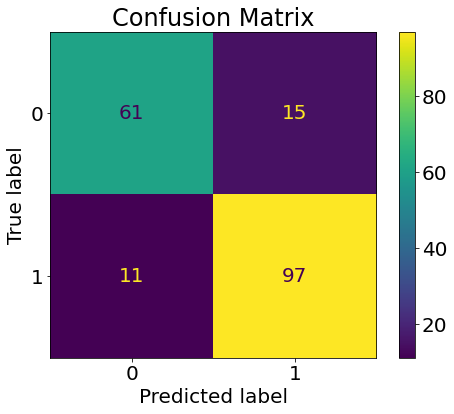

In [18]:
plot_confusion_matrix(Rm, X_test, y_test);
plt.title('Confusion Matrix');

<center>
    <img src="https://brewcode.stringlab.org/wp-content/uploads/2020/09/image-8.png" alt="Confusion Matrix" width="40%" >
</center>

In [19]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_Rm)

print('Confusion matrix:\n\n', cm)
print("\033[1m-----------------------------\033[0m")
print('\nTrue Positives(TP) = ', cm[0,0])
print("\033[1m-----------------------------\033[0m")
print('\nTrue Negatives(TN) = ', cm[1,1])
print("\033[1m-----------------------------\033[0m")
print('\nFalse Positives(FP) = ', cm[0,1])
print("\033[1m-----------------------------\033[0m")
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix:

 [[61 15]
 [11 97]]
-----------------------------

True Positives(TP) =  61
-----------------------------

True Negatives(TN) =  97
-----------------------------

False Positives(FP) =  15
-----------------------------

False Negatives(FN) =  11


<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        The confusion matrix shows 59 + 98 = 157 correct predictions and 10 + 17 = 27 incorrect predictions. 
    </p>
</div>

 **In this case, we have**

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:Green;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        True Positives (Actual Positive:1 and Predict Positive:1) - 59
    </p>
</div>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:Red;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        True Negatives (Actual Negative:0 and Predict Negative:0) - 98
    </p>
</div>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:DarkOrange;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        False Positives (Actual Negative:0 but Predict Positive:1) - 17 (Type I error) 
    </p>
</div>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:DarkSlateGray;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        False Negatives (Actual Positive:1 but Predict Negative:0) - 10 (Type II error)
    </p>
</div>

<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> Classification Report  </h2>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:Fuchsia;
       font-size:140%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        Classification report is another way to evaluate the classification model performance. It displays the  precision, recall, f1 and support scores for the model.
    </p>
</div>

> If we want a more comprehensive summary of precision, recall, and f1-score, we can use the classification_report convenience function to compute all three at once, and print them in a nice format.

> The classification_report function produces one line per class (here, True and False) and reports precision, recall, and f-score with this class as the positive class.

> The last column next to the f-score provides the support of each class, which simply means the number of samples in this class according to the ground truth.

> The last row in the classification report shows a weighted (by the number of samples in the class) average of the numbers for each class.

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_Rm))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        76
           1       0.87      0.90      0.88       108

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> Classification accuracy  </h2>

In [21]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [22]:
# print classification accuracy

classification_accuracy = ((TP + TN) / float(TP + TN + FP + FN)*100)

print('Classification accuracy : {0:0.2f}'.format(classification_accuracy),'%')

Classification accuracy : 85.87 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> Classification error  </h2>

In [23]:
classification_error = ((FP + FN) / float(TP + TN + FP + FN)*100)

print('Classification error : {0:0.2f}'.format(classification_error),'%')

Classification error : 14.13 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> Precision  </h2>

> **Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

> So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.</font>

> Mathematically, precision can be defined as the ratio of **TP to (TP + FP).**

<center>
    <img src="https://miro.medium.com/max/832/1*YLe6E6v9-GVln7TxzvgKJg.png" alt="Confusion Matrix" width="40%">
</center>

In [24]:
# precision score

precision = (TP / float(TP + FP)*100)


print('Precision : {0:0.2f}'.format(precision),"%")

Precision : 80.26 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> Recall  </h2>

> Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.

> **Recall** identifies the proportion of correctly predicted actual positives.</font>

> Mathematically, recall can be given as the ratio of **TP to (TP + FN).**</font>

In [25]:
# recall score

recall = (TP / float(TP + FN)*100)

print('Recall or Sensitivity : {0:0.2f}'.format(recall),"%")

Recall or Sensitivity : 84.72 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> True Positive Rate  </h2>

**True Positive Rate** is synonymous with **Recall**.

In [26]:
# true_positive_rate

true_positive_rate = (TP / float(TP + FN)*100)

print('True Positive Rate : {0:0.2f}'.format(true_positive_rate),"%")

True Positive Rate : 84.72 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> True False Positive Rate  </h2>

In [27]:
# true_positive_rate

false_positive_rate = (FP / float(FP + TN)*100)

print('False Positive Rate : {0:0.2f}'.format(false_positive_rate),"%")

False Positive Rate : 13.39 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> Specificity  </h2>

> Consider the example of a medical test for diagnosing a disease. Specificity relates to the test's ability to correctly reject healthy patients without a condition. Specificity of a test is the proportion of those who truly do not have the condition who test negative for the condition. Mathematically, this can also be written as:</font>
    
> A positive result in a test with high specificity is useful for ruling in disease. The test rarely gives positive results in healthy patients. A positive result signifies a high probability of the presence of disease.

> A test with 100% specificity will recognize all patients without the disease by testing negative, so a positive test result would definitely rule in the presence of the disease. However, a negative result from a test with high specificity is not necessarily useful for ruling out disease. For example, a test that always returns a negative test result will have a specificity of 100% because specificity does not consider false negatives. 

> A test like that would return negative for patients with the disease, making it useless for ruling out the disease.

In [28]:
# Specificity

specificity = (TN / (TN + FP)*100)

print('Specificity : {0:0.2f}'.format(specificity),'%')

Specificity : 86.61 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> Sensitivity  </h2>

> Consider the example of a medical test for diagnosing a condition. Sensitivity refers to the test's ability to correctly detect ill patients who do have the condition. In the example of a medical test used to identify a condition, the sensitivity (sometimes also named the detection rate in a clinical setting) of the test is the proportion of people who test positive for the disease among those who have the disease. Mathematically, this can be expressed as:
    
> A negative result in a test with high sensitivity is useful for ruling out disease. A high sensitivity test is reliable when its result is negative since it rarely misdiagnoses those who have the disease. A test with 100% sensitivity will recognize all patients with the disease by testing positive. A negative test result would definitively rule out presence of the disease in a patient. However, a positive result in a test with high sensitivity is not necessarily useful for ruling in disease. Suppose a 'bogus' test kit is designed to always give a positive reading. When used on diseased patients, all patients test positive, giving the test 100% sensitivity. However, sensitivity does not take into account false positives. The bogus test also returns positive on all healthy patients, giving it a false positive rate of 100%, rendering it useless for detecting or "ruling in" the disease.

> The calculation of sensitivity does not take into account indeterminate test results. If a test cannot be repeated, indeterminate samples either should be excluded from the analysis (the number of exclusions should be stated when quoting sensitivity) or can be treated as false negatives (which gives the worst-case value for sensitivity and may therefore underestimate it).

> A test with a higher sensitivity has a lower type II error rate.

In [29]:
# Sensitivity

Sensitivity = (TP / (TP + FN)*100)

print('Specificity : {0:0.2f}'.format(Sensitivity),"%")

Specificity : 84.72 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> f1-score  </h2>

**Definition: F1 score**

> Definition: F1 score is defined as the harmonic mean between precision and recall. It is used as a statistical measure to rate performance. In other words, an F1-score (from 0 to 1, 0 being lowest and 1 being the highest) is a mean of an individual’s performance, based on two factors i.e. precision and recall.

**What Does F1 Score Mean?**

> What is the definition of F1 score? Precision is defined as the accuracy of judgment. For example, in a random population sample of 100 people, to be counted for composition of male and female, Person A estimates the count of male population to be 70. If actually, the male count is 70 in the lot, Person A is said to have a 100% precision. Essentially, it is the ratio of estimates converting into reality.

**Example**
    
> Recall is identifying all the units in a sample that testify to a certain attribute. In the above example, if we know that actually there is a 7:3 Male to Female ratio, and person A is able to estimate only 56 out of the 70 male in the sample, the recall ration comes down to 84%. Recall is the ability to identify the number of samples that would really count positive for a specific attribute.
  
> In the field of statistics, to ascribe a simple number that would easily define the precision and recall scores of a test or an individual, a number ranging from 0 to 9 is assigned to depict the accuracy. This number is the harmonic mean of the score percentages of a test on each, precision and recall.</font>

> **f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of **f1-score** should be used to compare classifier models, not global accuracy.

**Theory f1 Score**

> F1 score (also known as F-measure, or balanced F-score) is a metric used to measure the performance of classification machine learning models. It is a popular metric to use for classification models as it provides robust results for both balanced and imbalanced datasets, unlike accuracy, and evaluates a model's recall and precision ability. The reason F1 is able to evaluate a model's precision and recall ability is due to the way it is derived, which is as follows:  
  
> F1 score ranges from 0 to 1, where 1 is a perfect score indicating that the model predicts each observation correctly. A good f1 score is of course dependent on the data you are working with and the use case, for example a model predicting cancer would have a very different expectation than an abandoned cart model. However, there is a general rule of thumb when it comes to f1 scores, which is as follows:

In [30]:
# f1 score

Rm_f1_score = round(f1_score(y_pred_Rm, y_test) * 100)
print('f1 Score : ',Rm_f1_score,"%")

f1 Score :  88 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia">Support  </h2>

**Support** is the actual number of occurrences of the class in our dataset.

<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia">ROC Curve </h2>

*ROC Curve (Receiver Operating Characteristic)*

- The ROC curve tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The X-axis is represented by False positive rates (Specificity) and the Y-axis is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.    

*Area under the ROC curve:*

- Area under the ROC (Receiver Operating Characteristic) curve : AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease  


<center>
    <img src="http://web.cs.ucla.edu/~mtgarip/images/ROC_curve.png" alt="ROC Curve" width="80%">
</center

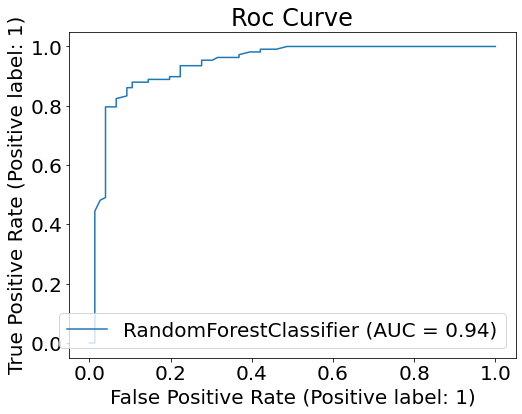

In [31]:
plot_roc_curve(Rm, X_test, y_test);
plt.title('Roc Curve');

<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia">Precision Recall Curve </h2>

> There are numerous ways to evaluate the performance of a classifier. In this article, we introduce the Precision-Recall Curve and further examine the difference between two popular performance reporting methods: Precision-Recall (PR) Curve and Receiver Operating Characteristic (ROC) Curve.

> A PR curve is simply a graph with Precision values on the y-axis and Recall values on the x-axis. In other words, the PR curve contains TP/(TP+FN) on the y-axis and TP/(TP+FP) on the x-axis.   
    
> - It is important to note that Precision is also called the Positive Predictive Value (PPV)
> - Recall is also called Sensitivity, Hit Rate or True Positive Rate (TPR)
    
**Interpreting a PR Curve**


> It is desired that the algorithm should have both high precision, and high recall. However, most machine learning algorithms often involve a trade-off between the two. A good PR curve has greater AUC (area under curve). In the figure above, the classifier corresponding to the Orange line has better performance than the classifier corresponding to the Other lines.It is important to note that the classifier that has a higher AUC on the ROC curve will always have a higher AUC on the PR curve as well.   

<center>
    <img src="https://www.researchgate.net/publication/338915798/figure/fig4/AS:853020388622336@1580387317390/Precision-recall-curve-per-model.ppm" alt="Precision Recall Curve" width="80%">
</center

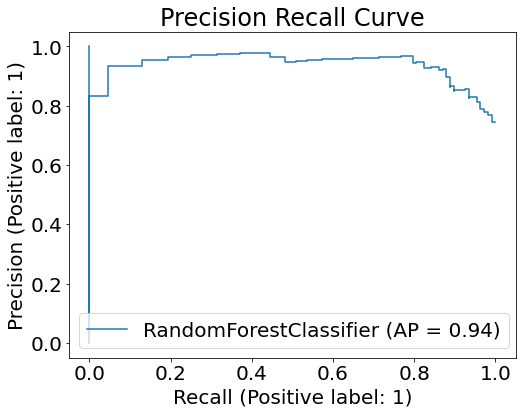

In [32]:
plot_precision_recall_curve(Rm, X_test, y_test)
plt.title('Precision Recall Curve');